In [93]:
# Loading the required python modules

import os
import pytesseract
import glob
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import wget, zipfile, os

filename = "license-plates"
if not os.path.isfile(filename):
    filename = wget.download('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Dataset/license-plates.zip')
    with zipfile.ZipFile("license-plates.zip","r") as zip_ref:
            zip_ref.extractall()

100% [............................................................................] 131666 / 131666

In [94]:
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'

In [102]:
path_for_license_plates = os.getcwd() + "/license-plates/**/*.jpg"
list_license_plates = []
predicted_license_plates = []

for path_to_license_plate in glob.glob(path_for_license_plates, recursive=True):
    
    license_plate_file = path_to_license_plate.split("/")[-1]
    s, _ = os.path.splitext(license_plate_file)
    _, license_plate = s.replace("-","").split("\\")
    '''
    Here we append the actual license plate to a list
    '''
    list_license_plates.append(license_plate)
    
    '''
    Read each license plate image file using openCV
    '''
    img = cv2.imread(path_to_license_plate)
    
    '''
    We then pass each license plate image file to the Tesseract OCR engine using 
    the Python library wrapper for it. We get back a predicted_result for the license plate.
    We append the predicted_result in a list and compare it with the original the license plate
    '''
    predicted_result = pytesseract.image_to_string(img, lang='eng', config='--oem 3 --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
    
    filter_predicted_result = "".join(predicted_result.split()).replace(":", "").replace("-", "")
    predicted_license_plates.append(filter_predicted_result)

In [103]:
print("      Actual License Plate", "\t", "Predicted License Plate", "\t", "Accuracy")
print("      --------------------", "\t", "-----------------------", "\t", "--------")

def calculate_predicted_accuracy(actual_list, predicted_list):
    for actual_plate, predict_plate in zip(actual_list, predicted_list):
        accuracy = "0%"
        num_matches = 0
        if actual_plate == predict_plate:
            accuracy = "100%"
        else:
            if len(actual_plate) == len(predict_plate):
                for a, p in zip(actual_plate, predict_plate):
                    if a == p:
                        num_matches += 1
                accuracy = str(round((num_matches/len(actual_plate)), 2) * 100)
                accuracy += "%"
        print("     ", actual_plate, "\t\t\t", predict_plate, "\t\t  ", accuracy)

        
calculate_predicted_accuracy(list_license_plates, predicted_license_plates)

      Actual License Plate 	 Predicted License Plate 	 Accuracy
      -------------------- 	 ----------------------- 	 --------
      AYO9034 			 AYO9034 		   100%
      GWT2180 			 GWT2120 		   86.0%
      JSQ1413 			 JSQ1413 		   100%
      NTK5785 			 NTK5785 		   100%
      NYY1710 			 NYY1710 		   100%
      NZW2197 			 NZW2197 		   100%
      OCX4764 			 OCX4764 		   100%
      ODJ1599 			 ODJ1599 		   100%
      OKS0078 			 OKS0078 		   100%
      OKV8004 			 OKV8004 		   100%
      OLA1208 			 OLA1208 		   100%
      OLC4728 			 OLC4728 		   100%
      OUP9563 			 OUP9563 		   100%
      OYJ9557 			 OYJ9557 		   100%
      PJB2414 			 PJB2414 		   100%
      PJB7392 			 PJB7392 		   100%
      PJD2685 			 PJD2685 		   100%
      PJG0783 			 PJG0783 		   100%


Text(0.5, 1.0, 'GWT2180 license plate')

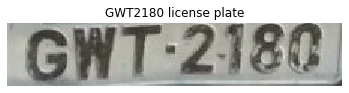

In [104]:
# Image Processing Techniques

# Read the license plate file and display it
test_license_plate = cv2.imread(os.getcwd() + "/license-plates/GWT2180.jpg")
plt.imshow(test_license_plate)
plt.axis('off')
plt.title('GWT2180 license plate')

In [33]:
# Image resizing

resize_test_license_plate = cv2.resize(test_license_plate, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

In [37]:
# Converting to Grayscale

grayscale_resize_test_license_plate = cv2.cvtColor(resize_test_license_plate, cv2.COLOR_BGR2GRAY)

In [38]:
# Denoising the Image

gaussian_blur_license_plate = cv2.GaussianBlur(grayscale_resize_test_license_plate, (5, 5), 0)

In [39]:
# Pass the transformed license plate file to the Tesseract OCR engine and see the predicted result

new_predicted_result_GWT2180 = pytesseract.image_to_string(gaussian_blur_license_plate, lang='eng', config='--oem 3 -l eng --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')

filter_new_predicted_result_GWT2180 = "".join(new_predicted_result_GWT2180.split()).replace(":", "").replace("-", "")

print(filter_new_predicted_result_GWT2180)

GWT2180


Text(0.5, 1.0, 'JSQ1413 license plate')

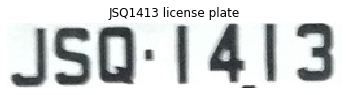

In [40]:
# 1.1 Read in the license plate file of JSQ1413
# Write your code below:

test_license_plate = cv2.imread(os.getcwd() + "/license-plates/JSQ1413.jpg")
plt.imshow(test_license_plate)

plt.axis('off')
plt.title('JSQ1413 license plate')

In [41]:
# 1.2 Apply the image processing techniques to the license plate of JSQ1413 described above 
# Write your code below:

resize_test_license_plate = cv2.resize(test_license_plate, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

grayscale_resize_test_license_plate = cv2.cvtColor(resize_test_license_plate, cv2.COLOR_BGR2GRAY)

gaussian_blur_license_plate = cv2.GaussianBlur(grayscale_resize_test_license_plate, (5, 5), 0)

In [42]:
# 1.3 Pass the modified license plate file to the Tesseract Engine. Report your findings 
# Write your code below:

new_predicted_result_JSQ1413 = pytesseract.image_to_string(gaussian_blur_license_plate, lang='eng', config='--oem 3 -l eng --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')

filter_new_predicted_result_JSQ1413 = "".join(new_predicted_result_JSQ1413.split()).replace(":", "").replace("-", "")

print(filter_new_predicted_result_JSQ1413)

JISQ1413
